<a href="https://colab.research.google.com/github/Obscurestr/boston_house_prices/blob/main/multivariable_regression_and_valuation_model__start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://i.imgur.com/WKQ0nH2.jpg height=350>

# Setup and Context


### Introduction

Welcome to Boston Massachusetts in the 1970s! Imagine you're working for a real estate development company. Your company wants to value any residential project before they start. You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

<img src=https://i.imgur.com/WfUSSP7.png height=350>

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

In [1]:
# %pip install --upgrade plotly

###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# TODO: Add missing import statements
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.metrics import r2_score

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [4]:
url = 'https://raw.githubusercontent.com/Obscurestr/boston_house_prices/main/boston.csv'
data = pd.read_csv(url)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration 🔎


* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
data.shape

(506, 15)

In [6]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


## Data Cleaning - Check for Missing Values and Duplicates

In [7]:
int(data.isna().sum().sum())

0

In [8]:
print(data[data.duplicated()])

Empty DataFrame
Columns: [Unnamed: 0, CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, PRICE]
Index: []


## Descriptive Statistics


* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [9]:
students_per_teacher=round(data['PTRATIO'].mean(),2)
print("Average number of students per teacher is",students_per_teacher)
average_price=round(data['PRICE'].mean(),2)
print("Average prace of home is ",average_price)

Average number of students per teacher is 18.46
Average prace of home is  22.53


In [10]:
print("Min CHAS:",data['CHAS'].min())
print("Max CHAS:",data['CHAS'].max())


Min CHAS: 0.0
Max CHAS: 1.0


In [11]:
print("Minimun number of rooms per dwelling is ",data['RM'].min())
print("Maximum number of rooms per dwelling is ",data['RM'].max())

Minimun number of rooms per dwelling is  3.561
Maximum number of rooms per dwelling is  8.78


## Visualise the Features

 Visualise the data for your model using following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.



#### House Prices 💰

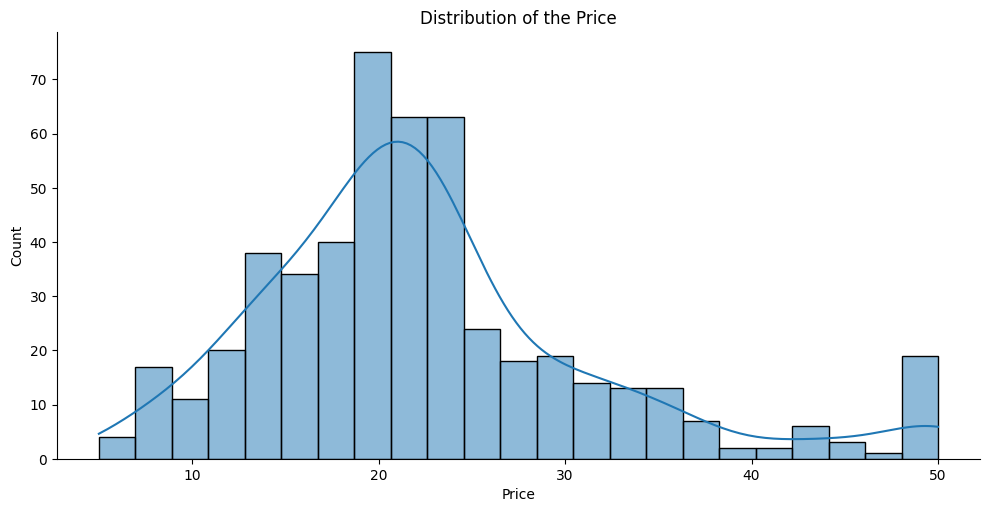

In [12]:
sns.displot(data=data,x='PRICE',kde=True,aspect=2)
plt.title("Distribution of the Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

#### Distance to Employment - Length of Commute 🚗

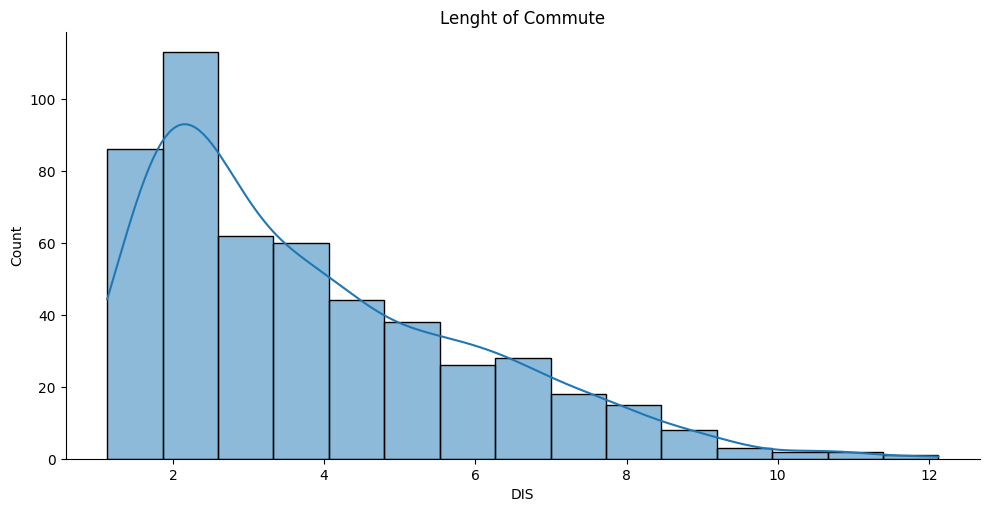

In [13]:
sns.displot(data=data,x='DIS',kde=True,aspect=2)
plt.title("Lenght of Commute")
plt.xlabel("DIS")
plt.ylabel("Count")
plt.show()

#### Number of Rooms

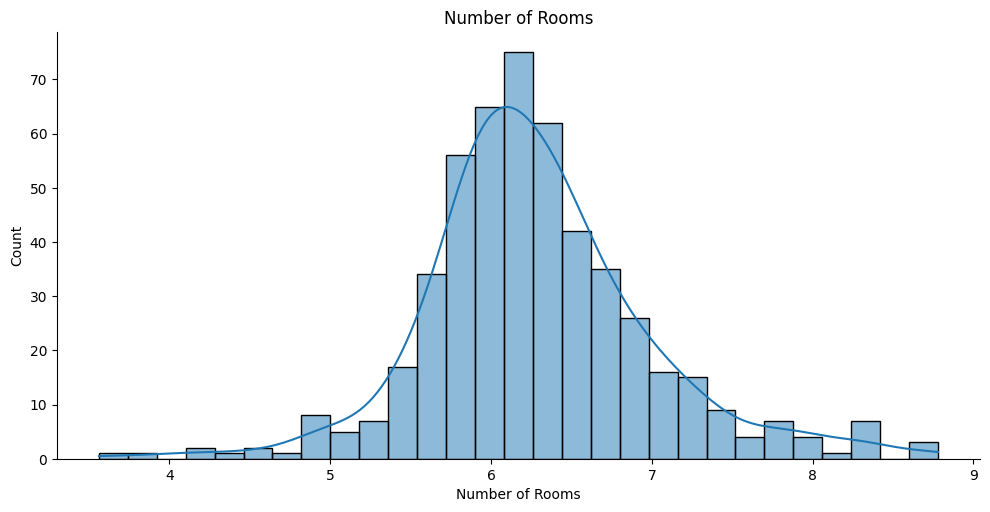

In [14]:
sns.displot(data=data,x='RM',kde=True,aspect=2)
plt.title("Number of Rooms")
plt.xlabel("Number of Rooms")
plt.ylabel("Count")
plt.show()

#### Access to Highways 🛣

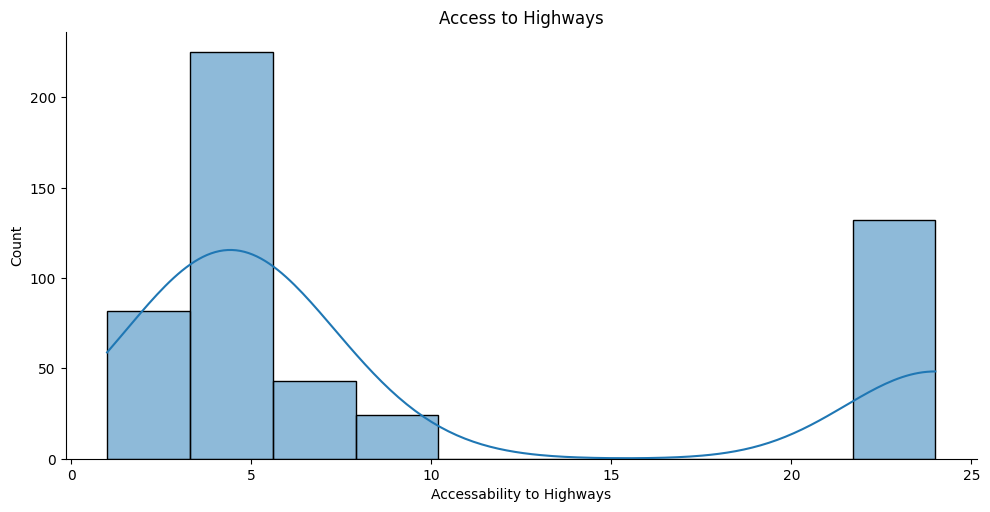

In [15]:
sns.displot(data=data,x='RAD',kde='True',aspect=2)
plt.title("Access to Highways")
plt.xlabel("Accessability to Highways")
plt.ylabel("Count")
plt.show()

#### Next to the River? ⛵️

 Show how many more home are not next to Charles River.


In [16]:
chas_counts=data['CHAS'].value_counts().sort_index()
x=['No','Yes']
y=[chas_counts[0],chas_counts[1]]

In [17]:
fig=px.bar(x=x,
           y=y,
           labels={"x":"Next to the Charles River","y":"Number of Homes"},
           title="Homes Near The Charles River")
fig.update_layout(yaxis=dict(tick0=0,dtick=50))
fig.show()

<img src=https://i.imgur.com/b5UaBal.jpg height=350>

# Understand the Relationships in the Data





There might be some relationships in the data that we should know about. Before we run the code, we should make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?


In [18]:
subset=data[['NOX','DIS','RM','PRICE','LSTAT']]

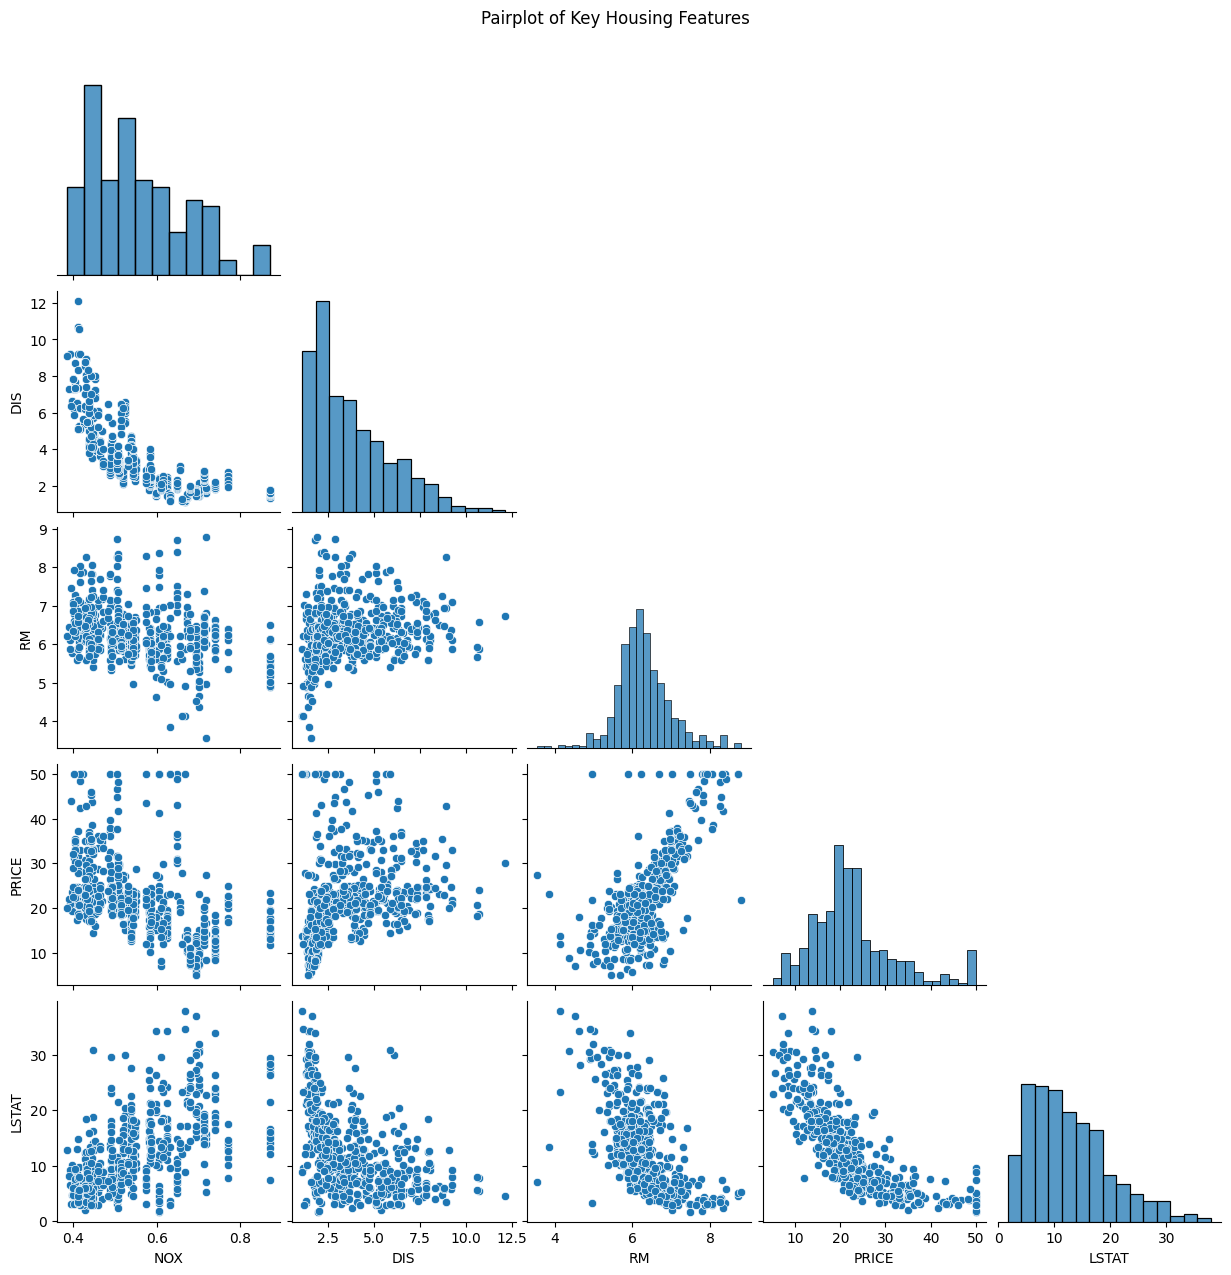

In [19]:
sns.pairplot(subset,corner=True)
plt.suptitle("Pairplot of Key Housing Features",y=1.02)
plt.show()



 Time to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE



#### Distance from Employment vs. Pollution


Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution).

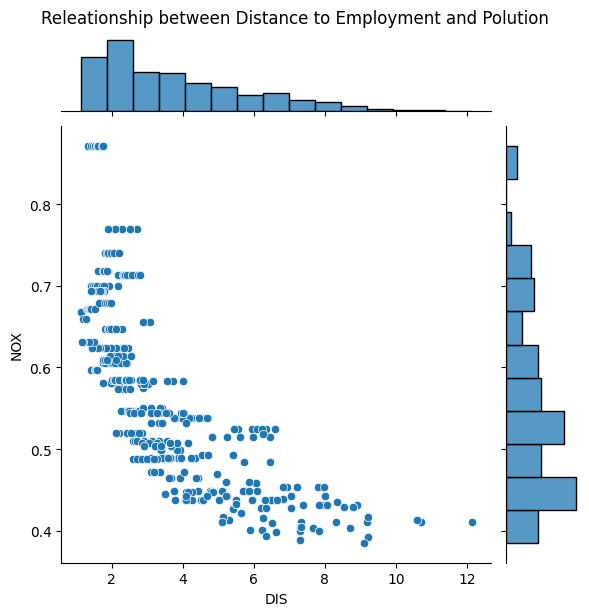

In [20]:
sns.jointplot(data=data,x='DIS',y='NOX',kind='scatter',height=6)
plt.suptitle("Releationship between Distance to Employment and Polution",y=1.02)
plt.show()

#### Proportion of Non-Retail Industry 🏭🏭🏭 versus Pollution

Compare INDUS (the proportion of non-retail industry i.e., factories) with NOX (Nitric Oxide Pollution).

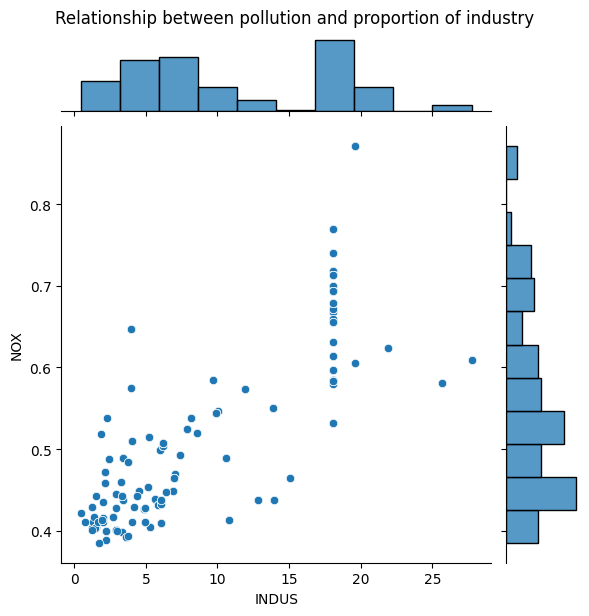

In [21]:
sns.jointplot(data=data,x='INDUS',y='NOX',kind='scatter',height=6)
plt.suptitle("Relationship between pollution and proportion of industry",y=1.02)
plt.show()

#### % of Lower Income Population vs Average Number of Rooms


Compare LSTAT (proportion of lower-income population) with RM (number of rooms).

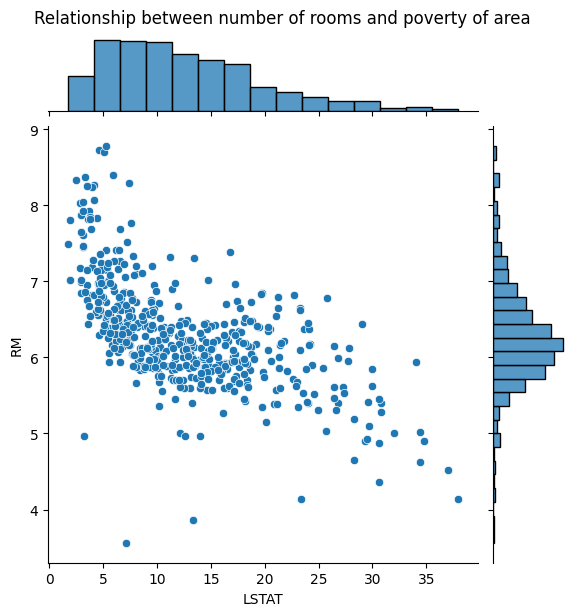

In [22]:
sns.jointplot(data=data,x='LSTAT',y='RM',kind='scatter',height=6)
plt.suptitle("Relationship between number of rooms and poverty of area",y=1.02)
plt.show()

#### % of Lower Income Population versus Home Price


Compare LSTAT with PRICE.

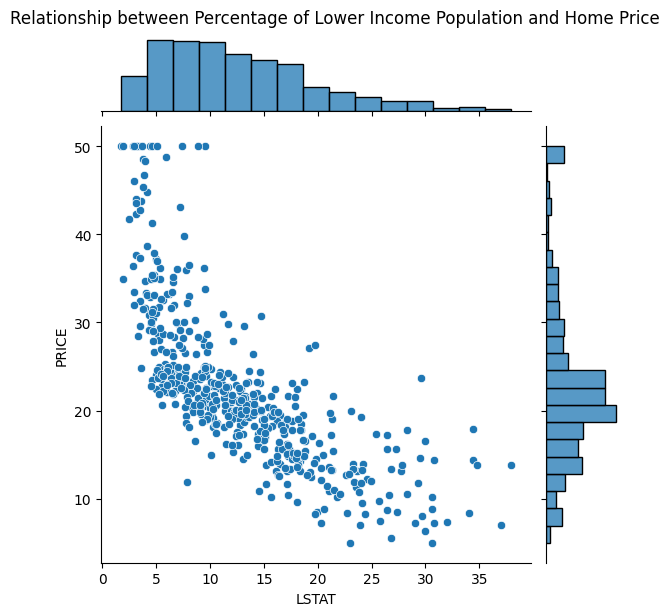

In [23]:
sns.jointplot(data=data,x='LSTAT',y='PRICE',kind='scatter',height=6)
plt.suptitle("Relationship between Percentage of Lower Income Population and Home Price",y=1.02)
plt.show()

#### Number of Rooms versus Home Value
Compare RM (number of rooms) with PRICE.

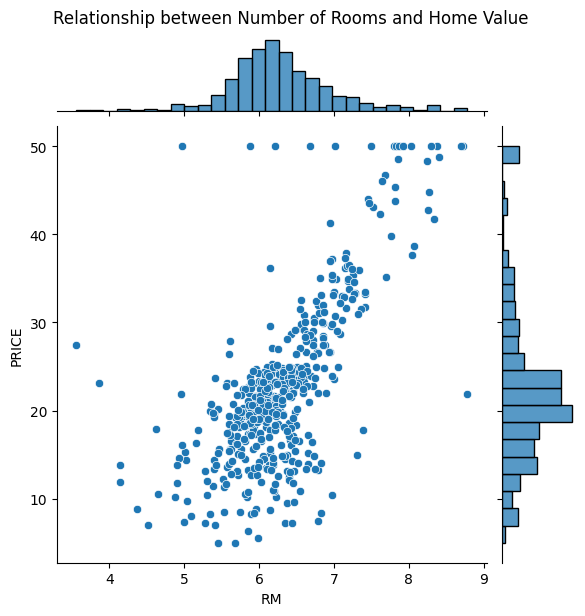

In [24]:
sns.jointplot(data=data,x='RM',y='PRICE',kind='scatter',height=6)
plt.suptitle("Relationship between Number of Rooms and Home Value",y=1.02)
plt.show()

# Split Training & Test Dataset



In [25]:
x=data.drop('PRICE',axis=1)
y=data['PRICE']
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=10
)

In [26]:
print(x_test.shape[0])
print(x_train.shape[0])

102
404


### Running our First Regression

In [27]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [28]:
r2_train=model.score(x_train,y_train)
print(f"r-squared on trainin data:{r2_train:.4f}")

r-squared on trainin data:0.7509


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative).



In [29]:
coefficients=pd.DataFrame({
    'Feature':x_train.columns,
    'Coefficient':model.coef_
})
print(coefficients.sort_values(by='Coefficient',ascending=False))

       Feature  Coefficient
6           RM         3.14
4         CHAS         1.99
9          RAD         0.32
2           ZN         0.06
7          AGE         0.01
12           B         0.01
0   Unnamed: 0        -0.00
3        INDUS        -0.01
10         TAX        -0.01
1         CRIM        -0.13
13       LSTAT        -0.58
11     PTRATIO        -0.83
8          DIS        -1.50
5          NOX       -16.25


In [30]:
price_difference=model.coef_[x_train.columns.get_loc('RM')]
print(f"Price difference for one extra room: ${price_difference*1000:.2f}")

Price difference for one extra room: $3136.21


### Analyse the Estimated Values & Regression Residuals

The next step is to evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals**.

```
predicted_values = regr.predict(X_train)
residuals = (y_train - predicted_values)
```





Text(0.5, 1.0, 'Actual vs Predicted Values')

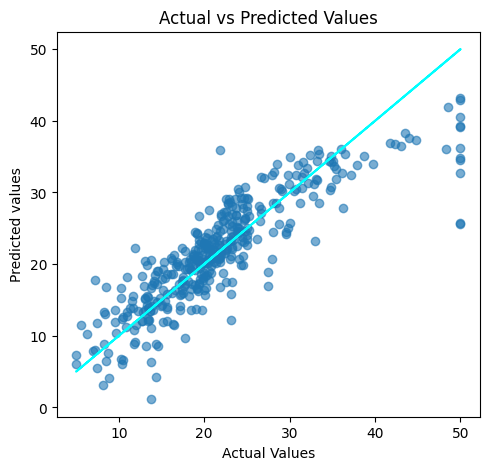

In [31]:
predicted_values=model.predict(x_train)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_train,predicted_values,alpha=0.6)
plt.plot(y_train,y_train,color='cyan',label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted Values")


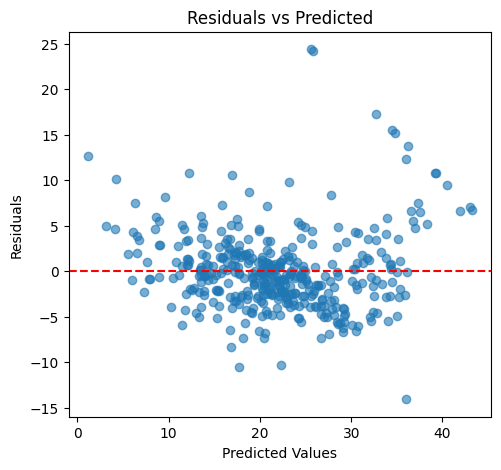

In [32]:
residuals=(y_train-predicted_values)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(predicted_values,residuals,alpha=0.6)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

Why do we want to look at the residuals? We want to check that they look random. Why? The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.


In [33]:
mean_residual=residuals.mean()
skewness_residual=skew(residuals)
print(f"Mean of residuals:{mean_residual:.4f}")
print(f"Skewness of residuals:{skewness_residual:.4f}")

Mean of residuals:-0.0000
Skewness of residuals:1.4421


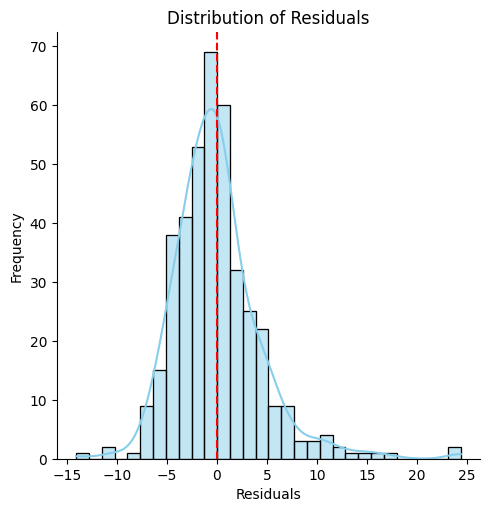

In [34]:
sns.displot(residuals,kde=True,bins=30,color='skyblue')
plt.axvline(x=0,color='red',linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Data Transformations for a Better Fit

We have two options at this point:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.



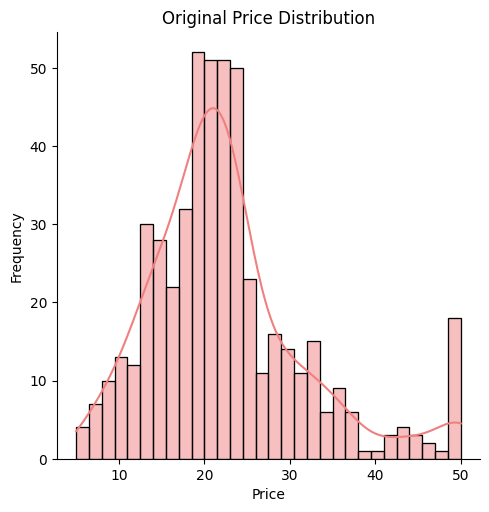

In [35]:
sns.displot(data['PRICE'],kde=True,bins=30,color='lightcoral')
plt.title('Original Price Distribution')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [36]:
original_skew=skew(data['PRICE'])
print(f"Skewness of the original price is {original_skew:.4f}")

Skewness of the original price is 1.1048


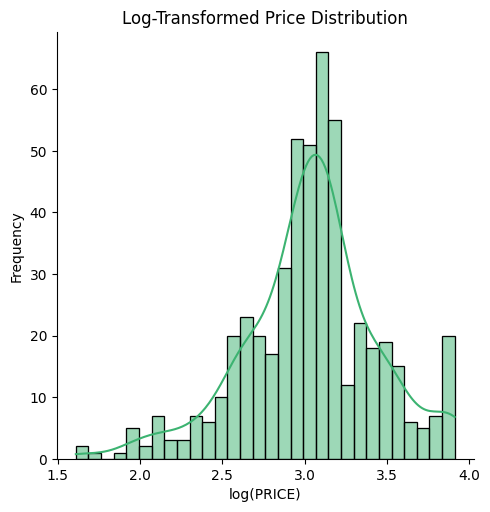

In [37]:
log_price=np.log(data['PRICE'])
sns.displot(log_price,kde=True,bins=30,color='mediumseagreen')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(PRICE)")
plt.ylabel("Frequency")
plt.show()

In [38]:
log_skew=skew(log_price)
print(f"Skewness of log-transformed PRICE:{log_skew:.4f}")

Skewness of log-transformed PRICE:-0.3293


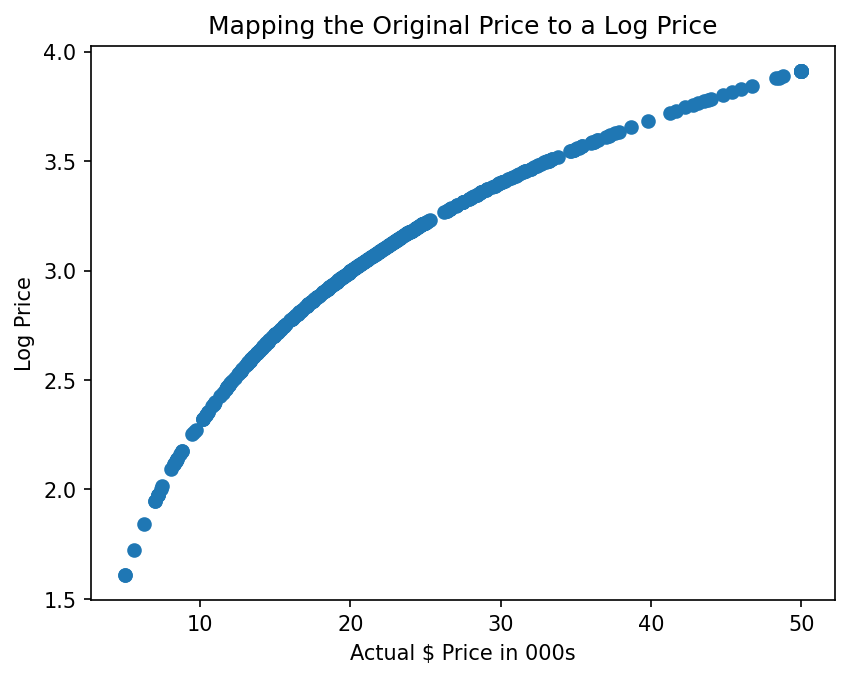

In [39]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, np.log(data.PRICE))

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices



In [40]:
data['LOG_PRICE']=np.log(data['PRICE'])
x=data.drop(columns=['PRICE','LOG_PRICE'])
y_log=data['LOG_PRICE']
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.2,random_state=42)
model_log=LinearRegression()
model_log.fit(x_train,y_train_log)
y_train_pred_log=model_log.predict(x_train)
r2_log=r2_score(y_train_log,y_train_pred_log)
print(f"R-squared (log-transformed target):{r2_log:.4f}")

R-squared (log-transformed target):0.7968


In [41]:
r2_original=r2_score(y_train,model.predict(x_train))
print(f"R-squared (original target):{r2_original:.4f}")

R-squared (original target):-0.8346


## Evaluating Coefficients with Log Prices



In [42]:
coeff_df=pd.DataFrame({
    'Feature':x_train.columns,
    'Coefficient':model_log.coef_
}).sort_values(by='Coefficient',ascending=False)

In [43]:
print(coeff_df)

       Feature  Coefficient
6           RM         0.12
4         CHAS         0.10
9          RAD         0.01
3        INDUS         0.00
2           ZN         0.00
12           B         0.00
0   Unnamed: 0        -0.00
7          AGE        -0.00
10         TAX        -0.00
1         CRIM        -0.01
13       LSTAT        -0.03
11     PTRATIO        -0.04
8          DIS        -0.05
5          NOX        -0.72


## Regression with Log Prices & Residual Plots



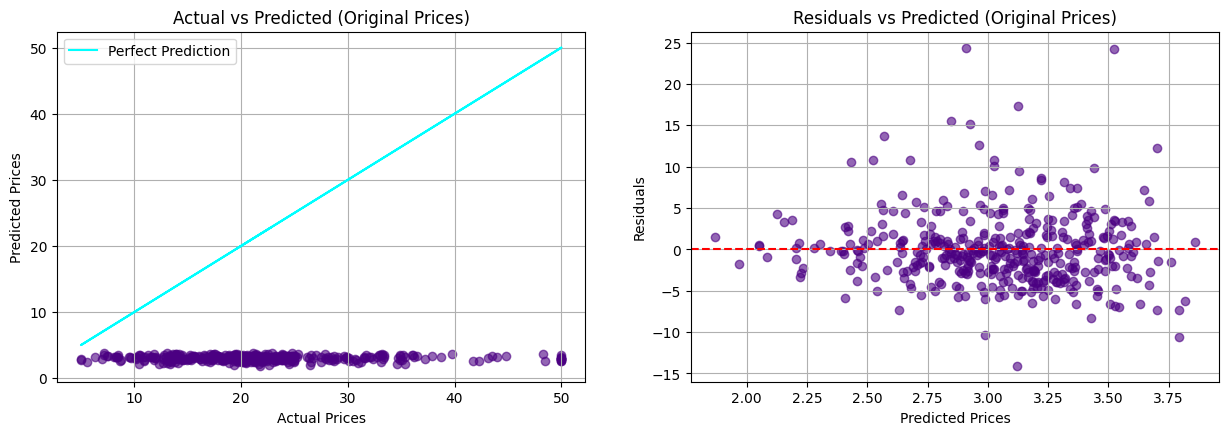

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(y_train, y_train_pred_log, color='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan', label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Original Prices)", fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 2)
plt.scatter(y_train_pred_log, residuals, color='indigo', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Original Prices)", fontsize=12)
plt.grid(True)

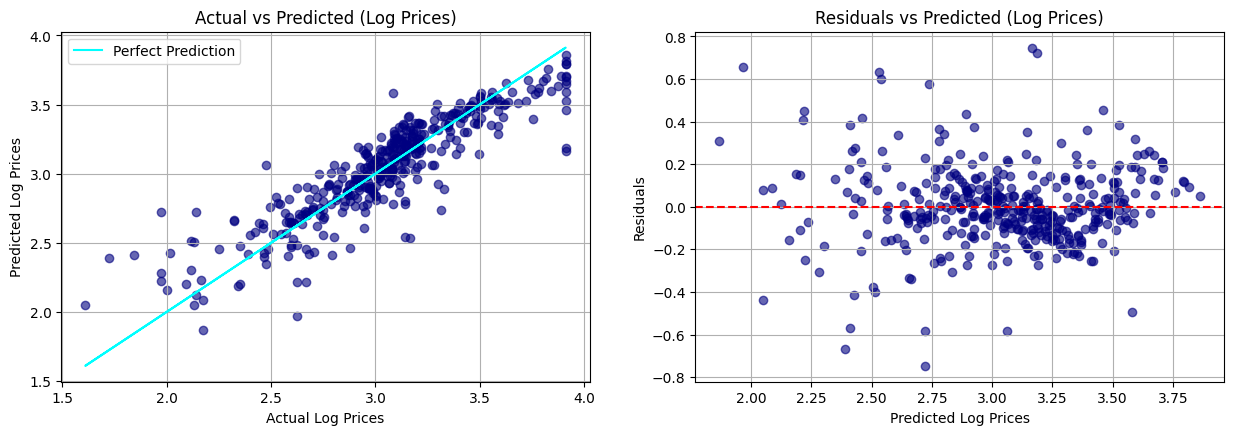

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3)
plt.scatter(y_train_log, y_train_pred_log, color='navy', alpha=0.6)
plt.plot(y_train_log, y_train_log, color='cyan', label='Perfect Prediction')
plt.xlabel("Actual Log Prices")
plt.ylabel("Predicted Log Prices")
plt.title("Actual vs Predicted (Log Prices)", fontsize=12)
plt.grid(True)
plt.legend()
plt.subplot(2, 2, 4)
residuals_log = y_train_log - y_train_pred_log
plt.scatter(y_train_pred_log, residuals_log, color='navy', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Log Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Log Prices)", fontsize=12)
plt.grid(True)



Calculating the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?

In [46]:
mean_log_resid = residuals_log.mean()
print(f"Mean of residuals (log prices):{mean_log_resid:.4f}")

Mean of residuals (log prices):-0.0000


In [47]:

skew_log_resid=skew(residuals_log)
print(f"Skewness of residuals (log prices): {skew_log_resid:.4f}")

Skewness of residuals (log prices): 0.2839


# Compare Out of Sample Performance



In [48]:
y_test_pred_orig = model.predict(x_test)
r2_orig_test = r2_score(y_test, y_test_pred_orig)
print(f"R-squared (original model on test): {r2_orig_test:.4f}")

R-squared (original model on test): -0.9512


In [49]:
y_test_pred_log = model_log.predict(x_test)
r2_log_test = r2_score(y_test_log, y_test_pred_log)
print(f"R-squared (log-transformed model on test): {r2_log_test:.4f}")

R-squared (log-transformed model on test): 0.7444


# Predict a Property's Value using the Regression Coefficients



In [50]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE','LOG_PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,252.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65




Predict how much the average property is worth using the stats above.

In [51]:
log_price_pred = model.predict(property_stats)[0]
dollar_price_pred = np.exp(log_price_pred)

In [52]:
print(f"Predicted log price: {log_price_pred:.4f}")
print(f"Predicted dollar price: ${dollar_price_pred:,.2f}")

Predicted log price: 22.3767
Predicted dollar price: $5,224,893,639.85




Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [53]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [54]:
# Solution:
property_stats.loc[0, 'CHAS'] = 1 if next_to_river else 0
property_stats.loc[0, 'RM'] = nr_rooms
property_stats.loc[0, 'PTRATIO'] = students_per_classroom
property_stats.loc[0, 'DIS'] = distance_to_town
property_stats.loc[0, 'NOX'] = pollution
property_stats.loc[0, 'LSTAT'] = amount_of_poverty
log_price_pred = model_log.predict(property_stats)[0]
dollar_price_pred = np.exp(log_price_pred)

In [55]:
print(f"Predicted log price: {log_price_pred:.4f}")
print(f"Predicted dollar price: ${dollar_price_pred:,.2f}")

Predicted log price: 3.3145
Predicted dollar price: $27.51
